<a href="https://colab.research.google.com/github/roydatascientist/Fraudulent-Transactions-Prediction/blob/master/Fraudulent_Transactions_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**`Importing essential libraries`**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

#**`Loading Data`**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Course/0. Sample Dataset/Fraudulent Transactions Prediction/Fraud.csv')

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.shape

(6362620, 11)

# **Data preprocessing**

*Removing duplicities from dataset*

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


*Removing null values*

In [8]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

*Counting values for 'type' column*

In [9]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

*Data visualization for 'type' column*

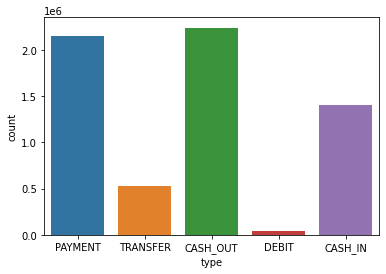

In [10]:
sns.countplot(df['type'])

*Counting values for 'isFraud' column*

In [11]:
fraud_count = df['isFraud'].value_counts()

In [12]:
fraud_count

0    6354407
1       8213
Name: isFraud, dtype: int64

*Pie chart for counting fraud*

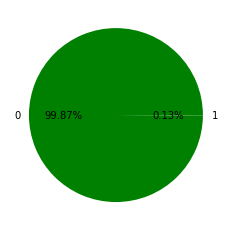

In [13]:
plt.pie(fraud_count,labels=fraud_count.keys(),autopct='%.2f%%', colors='g');

*Only 0.13% Fraudulent transactions in the above diagram.*

In [14]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0



*Checking number of unique values from each columns*

In [15]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [17]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [18]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


*Showing collerelation between Columns*

In [19]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


*Heat Map for showing correlations*

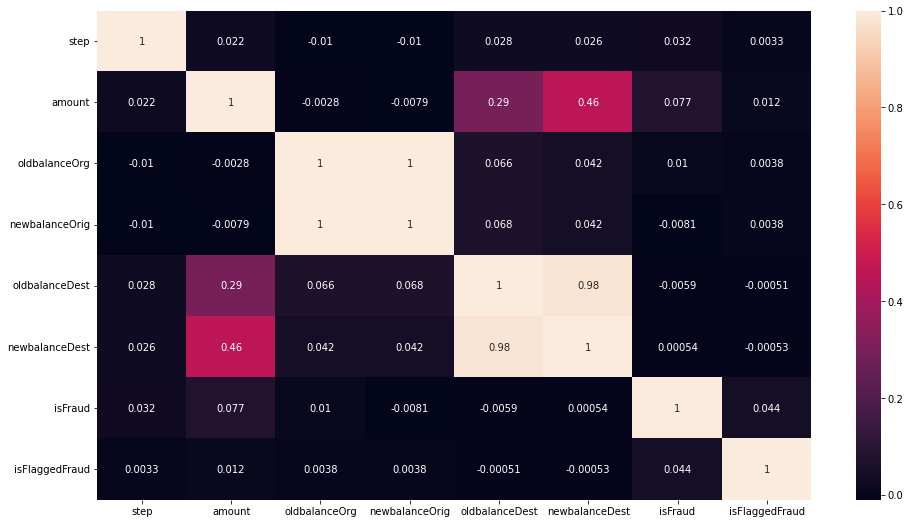

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

# **Feature engineering**

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [22]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.00,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.00,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.00,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.00,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.00,40348.79,0,0


# **Splitting data into x and y**

In [25]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [26]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# **Data augmentation**

*Using Synthetic Minority Oversampling TEchnique (SMOTE) to remove imbalancement in y data*

In [27]:
from imblearn.over_sampling import SMOTE

over_sample = SMOTE(random_state=0)

x,y = over_sample.fit_resample(x,y)

In [28]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

# **Feature Scaling**

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# **Train-test splitting**

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

# **Applying Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()

In [32]:
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = lr_classifier.predict(x_test)


# **Checking Performance of the model**

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[1793231,  112744],
       [ 182565, 1724105]])

In [36]:
accuracy_score(y_test,y_pred)

0.9225448474746534

In [37]:
report=classification_report(y_test,y_pred)

In [38]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92   1905975
           1       0.94      0.90      0.92   1906670

    accuracy                           0.92   3812645
   macro avg       0.92      0.92      0.92   3812645
weighted avg       0.92      0.92      0.92   3812645



# **Cross Validation**

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_sc = cross_val_score(lr_classifier,x,y,cv=3)

In [50]:
print(cross_val_sc)
print(cross_val_sc.mean())

[0.92916602 0.92876612 0.79522155]
0.8843845661143946
